<a href="https://colab.research.google.com/github/stevelee0503/ML_pipeline/blob/main/ML_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

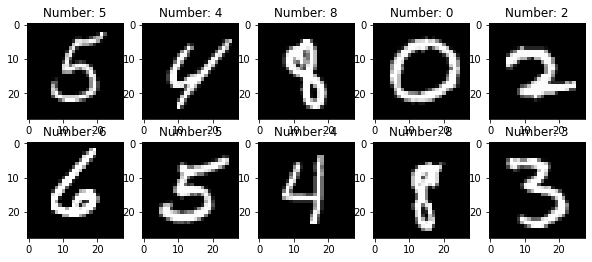

Accuracy: 0.9208571428571428
Confusion matrix:
[[1294    1    7    0    3   13   13    4    6    2]
 [   0 1550    6   10    3   12    0    4   13    2]
 [   5   20 1234   21   15    9   20   17   29   10]
 [   6    9   30 1282    1   39    7   18   23   18]
 [   6    3    6    4 1201    5   11    8    7   44]
 [   4   10    7   41   12 1125   20    4   36   14]
 [   5    4   19    1   14   17 1331    2    3    0]
 [   6    4   26    3   11    6    0 1415    1   31]
 [  10   26   13   43    6   42    9    9 1179   20]
 [   7   11    6   13   36    7    0   44   15 1281]]


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

class MNISTPipeline:
    def __init__(self):
        self.model = None
    
    def load_data(self):
        mnist = fetch_openml('mnist_784')
        X, y = mnist['data'].values, mnist['target'].values
        return X, y
    
    def preprocess_data(self, X, y):
        # 0~1 사이로 스케일링
        X = X / 255.
        # train/test 데이터로 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test
    
    def train_model(self, X_train, y_train):
        # 로지스틱 회귀 모델 학습
        self.model = LogisticRegression(max_iter=1000)
        self.model.fit(X_train, y_train)
    
    def predict(self, X_test):
        # 예측
        y_pred = self.model.predict(X_test)
        return y_pred
    
    def evaluate(self, y_test, y_pred):
        # 정확도 및 오차 행렬 출력
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        return acc, cm
    
    def visualize_data(self, X_train, y_train):
        # 데이터 시각화
        fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
        for i, ax in enumerate(axes.flat):
            ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
            ax.set(title = f"Number: {y_train[i]}")
        plt.show()
        
pipeline = MNISTPipeline()
X, y = pipeline.load_data()
X_train, X_test, y_train, y_test = pipeline.preprocess_data(X, y)
pipeline.visualize_data(X_train, y_train)
pipeline.train_model(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc, cm = pipeline.evaluate(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Confusion matrix:\n{cm}")
